<a href="https://colab.research.google.com/github/Islam-I-Abdelmajied/Brain-Tumor-Classification/blob/master/Brain_Tumor_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing 

In [0]:
!pip install wget
!pip install mat73

### 1) Extract data

In [0]:
import wget
from tqdm import tqdm
url ='https://ndownloader.figshare.com/articles/1512427/versions/5'
wget.download(url)
import os
os.rename('1512427.zip', 'mat_data.zip')



import zipfile
with zipfile.ZipFile("mat_data.zip","r") as zip_ref:
    zip_ref.extractall("datasetzipfiles")
os.remove('/content/mat_data.zip')


os.remove('/content/datasetzipfiles/README.txt')
os.remove('/content/datasetzipfiles/cvind.mat')

zipfiles = os.listdir('/content/datasetzipfiles')


for file in tqdm(zipfiles):
    with zipfile.ZipFile('/content/datasetzipfiles/'+file,"r") as zip_ref:
        zip_ref.extractall("/content/dataset")
    os.remove('/content/datasetzipfiles/'+file)
os.rmdir('/content/datasetzipfiles')


100%|██████████| 4/4 [00:20<00:00,  4.80s/it]


In [0]:
#Check data
mat_dataset = os.listdir('/content/dataset')
print(len(mat_dataset))
print(mat_dataset[0])

3064
3023.mat


In [0]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils, models

import numpy as np 
import PIL
import os

import mat73
from tqdm import tqdm
import matplotlib.pyplot as plt 
%matplotlib inline
plt.ion()

## Data loading

In [0]:
########### try using balanced classes 708 930 1000 ###########

### 2) Transform data

In [0]:
# def mat_to_list(dir):
#     files = os.listdir(dir)
#     data_struct = []

#     for file in tqdm(files):
#         data_dict = mat73.loadmat(dir + file)
#         data_struct.append([np.float32(data_dict['cjdata']['image']), int(data_dict['cjdata']['label'])-1])
#     return data_struct

# dataset = mat_to_list('/content/dataset/')



In [0]:
# dataset = mat_to_list('/content/dataset/')
# batch_size = 16
# test_size = .2
# valid_size = .2
# shuffle_dataset = True
# seed= 69

# dataset_size = len(dataset)
# train_split = int(np.floor(dataset_size - dataset_size * (test_size + valid_size) ))
# test_split = int(np.floor(train_split + dataset_size * test_size ))

# indices = list(range(dataset_size))
# if shuffle_dataset :
#     np.random.seed(seed)
#     np.random.shuffle(indices)

# train_indices, test_indices, valid_indices = indices[:train_split], indices[train_split: test_split], indices[test_split:]

100%|██████████| 3064/3064 [00:26<00:00, 115.76it/s]


In [0]:
# len(dataset)

3064

In [0]:
# train_dataset = dataset[:train_split]
# test_dataset = dataset[train_split: test_split]
# valid_dataset = dataset[test_split:]

In [0]:
# print(len(train_dataset))
# print(len(test_dataset))
# print(len(valid_dataset))

1838
612
614


In [0]:
class BrainTumorDataset(Dataset):
    def __init__(self, dir, transform=None):

        self.files = os.listdir(dir)
        self.data_struct = []
        self.transform = transform

        for file in tqdm(self.files):
            data_dict = mat73.loadmat(dir + file)
            self.data_struct.append([np.float32(data_dict['cjdata']['image']), int(data_dict['cjdata']['label'])-1])
        
    def __len__(self):
        return len(self.data_struct)

    def __getitem__(self, index):

        image = PIL.Image.fromarray(self.data_struct[index][0])


        if self.transform:
            image = self.transform(image)

        label = self.data_struct[index][1]

        sample = image , label
        return sample

In [0]:
data_transform = transforms.Compose([transforms.Resize(512),
                                     transforms.ToTensor()])

### 3) Load data

In [0]:
dataset = BrainTumorDataset('/content/dataset/', transform=data_transform)

batch_size = 32
test_size = .2
valid_size = .2
shuffle_dataset = True
seed= 69

dataset_size = len(dataset)
train_split = int(np.floor(dataset_size - dataset_size * (test_size + valid_size) ))
test_split = int(np.floor(train_split + dataset_size * test_size ))

indices = list(range(dataset_size))
if shuffle_dataset :
    np.random.seed(seed)
    np.random.shuffle(indices)

train_indices, test_indices, valid_indices = indices[:train_split], indices[train_split: test_split], indices[test_split:]

train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)
valid_sampler = SubsetRandomSampler(valid_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)
valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

 12%|█▏        | 354/3064 [00:02<00:20, 132.27it/s]


KeyboardInterrupt: ignored

In [0]:
dataset = BrainTumorDataset('/content/dataset/', transform=data_transform)

batch_size = 32
test_size = 0
valid_size = 0.3
shuffle_dataset = True
seed= 69

dataset_size = len(dataset)
train_split = int(np.floor(dataset_size - dataset_size * (test_size + valid_size) ))
test_split = int(np.floor(train_split + dataset_size * test_size ))

indices = list(range(dataset_size))
if shuffle_dataset :
    np.random.seed(seed)
    np.random.shuffle(indices)

train_indices, test_indices, valid_indices = indices[:train_split], indices[train_split: test_split], indices[test_split:]

train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)
valid_sampler = SubsetRandomSampler(valid_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)
valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

100%|██████████| 3064/3064 [00:23<00:00, 131.66it/s]


In [0]:
# mean = 0.
# std = 0.
# nb_samples = 0.
# for data in train_loader:
#     batch_samples = data.size(0)
#     data = data.view(batch_samples, data.size(1), -1)
#     mean += data.mean(2).sum(0)
#     std += data.std(2).sum(0)
#     nb_samples += batch_samples

# mean /= nb_samples
# std /= nb_samples

torch.Size([32, 1, 512, 512])
tensor(2)
tensor([2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2,
        0, 1, 1, 0, 2, 1, 1, 0])


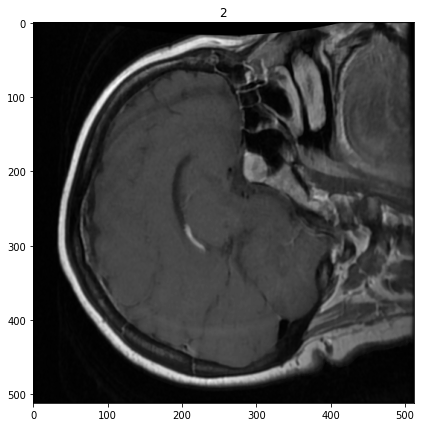

In [0]:
images, labels = next(iter(train_loader))
fig= plt.figure(figsize=(7, 7))
print(images.shape)
print(labels[3])
print(labels)
plt.imshow(images[0][0], cmap='gray')
plt.title(int(labels[0]))
plt.show()

In [0]:
###############################################################
print(len(train_indices))
print(len(test_indices))
print(len(valid_indices))

2144
0
920


In [0]:
##################### Network#################

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import copy
import time

In [0]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [0]:
dataset_sizes = {'train': len(train_indices), 'val': len(valid_indices)}
dataset_sizes

{'train': 2144, 'val': 920}

In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = valid_loader

            running_loss = 0.0
            running_corrects = 0


            # Iterate over data.
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
# def visualize_model(model, num_images=6):
#     was_training = model.training
#     model.eval()
#     images_so_far = 0
#     fig = plt.figure()

#     with torch.no_grad():
#         for i, (inputs, labels) in enumerate(valid_loader):
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             outputs = model(inputs)
#             _, preds = torch.max(outputs, 1)

#             for j in range(inputs.size()[0]):
#                 images_so_far += 1
#                 ax = plt.subplot(num_images//2, 2, images_so_far)
#                 ax.axis('off')
#                 ax.set_title('predicted: {}'.format(class_names[preds[j]]))
#                 imshow(inputs.cpu().data[j])

#                 if images_so_far == num_images:
#                     model.train(mode=was_training)
#                     return
#         model.train(mode=was_training)

In [0]:
network = models.vgg11_bn(pretrained=False)
num_features = network.classifier[6].in_features
###########################################  {{here!!}}
network.classifier[6] = nn.Linear(num_features, 3)
###########################################  {{here!!}}
network.features[0] = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
network = network.to(device)

In [0]:
resnet50_model = models.resnet50(pretrained=True)
resnet50_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet50_model.fc = nn.Linear(in_features=2048, out_features=3, bias=True)
resnet50_model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
from torchsummary import summary

summary(resnet50_model, (1, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           3,136
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
         MaxPool2d-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]           4,096
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,864
       BatchNorm2d-9         [-1, 64, 128, 128]             128
             ReLU-10         [-1, 64, 128, 128]               0
           Conv2d-11        [-1, 256, 128, 128]          16,384
      BatchNorm2d-12        [-1, 256, 128, 128]             512
           Conv2d-13        [-1, 256, 128, 128]          16,384
      BatchNorm2d-14        [-1, 256, 1

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50_model.parameters(), lr=0.003, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [0]:
train = train_model(resnet50_model, criterion, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5705 Acc: 0.7579
val Loss: 0.2649 Acc: 0.9043

Epoch 1/24
----------
train Loss: 0.2641 Acc: 0.8969
val Loss: 0.3335 Acc: 0.8717

Epoch 2/24
----------
train Loss: 0.1672 Acc: 0.9394
val Loss: 0.1351 Acc: 0.9489

Epoch 3/24
----------
train Loss: 0.0750 Acc: 0.9748
val Loss: 0.1206 Acc: 0.9630

Epoch 4/24
----------
train Loss: 0.0284 Acc: 0.9921
val Loss: 0.4143 Acc: 0.8641

Epoch 5/24
----------
train Loss: 0.0256 Acc: 0.9935
val Loss: 0.0530 Acc: 0.9826

Epoch 6/24
----------
train Loss: 0.0101 Acc: 0.9981
val Loss: 0.0424 Acc: 0.9859

Epoch 7/24
----------
train Loss: 0.0038 Acc: 1.0000
val Loss: 0.0411 Acc: 0.9859

Epoch 8/24
----------
train Loss: 0.0040 Acc: 0.9991
val Loss: 0.0400 Acc: 0.9859

Epoch 9/24
----------
train Loss: 0.0031 Acc: 1.0000
val Loss: 0.0387 Acc: 0.9870

Epoch 10/24
----------
train Loss: 0.0030 Acc: 1.0000
val Loss: 0.0392 Acc: 0.9859

Epoch 11/24
----------
train Loss: 0.0025 Acc: 1.0000
val Loss: 0.0396 Acc: 0.9848

Ep

In [0]:
# class Normalize(transforms.Normalize):
#     super(self).__init__():



# # class MyDataset(Dataset):
# #     def __init__(self):
# #         self.data = torch.randn(100, 3, 24, 24)
        
# #     def __getitem__(self, index):
# #         x = self.data[index]
# #         return x

# #     def __len__(self):
# #         return len(self.data)
    

# # dataset = MyDataset()
# # loader = DataLoader(
# #     dataset,
# #     batch_size=10,
# #     num_workers=1,
# #     shuffle=False
# # )


# mean = 0.
# std = 0.
# nb_samples = 0.
# for data in loader:
#     batch_samples = data.size(0)
#     data = data.view(batch_samples, data.size(1), -1)
#     mean += data.mean(2).sum(0)
#     std += data.std(2).sum(0)
#     nb_samples += batch_samples

# mean /= nb_samples
# std /= nb_samples

In [0]:
from torchsummary import summary

summary(network, (1, 128, 128), -1, 'cuda')

RuntimeError: ignored